In [10]:
import pandas as pd
import sqlite3

---
## Draw both views and commits metrics on the same graph

- analyze only the ***users*** and ***not*** the ***admins***
- analyze only the ***dates*** when there were ***both views*** and ***checker commits***
- use ***size*** of the ***font*** should be ***8***
- the ***size*** of the ***figure*** is ***(15,8)***

In [11]:
con = sqlite3.connect('../data/checking-logs.sqlite')

### Tables we have

In [12]:
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', con)

,name
0,pageviews
1,checker
2,deadlines


### Table `pageviews`

In [13]:
pd.read_sql('SELECT * FROM pageviews LIMIT 3', con)

,index,uid,datetime
0,0,admin_1,2020-04-17 12:01:08.463179
1,1,admin_1,2020-04-17 12:01:23.743946
2,2,admin_3,2020-04-17 12:17:39.287778


### Table `checker`

In [14]:
pd.read_sql('SELECT * FROM checker LIMIT 3', con)

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1


### Table `views_commits` containing `commits` and `views` of `users` per day

In [15]:
query = """
SELECT
    commits.day AS date,
    commits.commits,
    views.views
FROM
(
    SELECT
        strftime('%Y-%m-%d', timestamp) AS day, COUNT(timestamp) AS commits
    FROM
        checker
    WHERE
        uid LIKE 'user_%'
    GROUP BY
        day
) commits
INNER JOIN
(
    SELECT
        strftime('%Y-%m-%d', datetime) AS day, COUNT(datetime) AS views
    FROM
        pageviews
    WHERE
        uid LIKE 'user_%'
    GROUP BY
        day
) views
ON
    commits.day = views.day
"""
views_commits = pd.read_sql(query, con, index_col='date')
views_commits.index = pd.to_datetime(views_commits.index)
print(len(views_commits))
views_commits.head()

32


,commits,views
date,,
2020-04-17,23,1
2020-04-18,69,23
2020-04-19,33,15
2020-04-21,25,3
2020-04-22,28,1


<AxesSubplot:title={'center':'Views and commits per day'}, xlabel='date'>

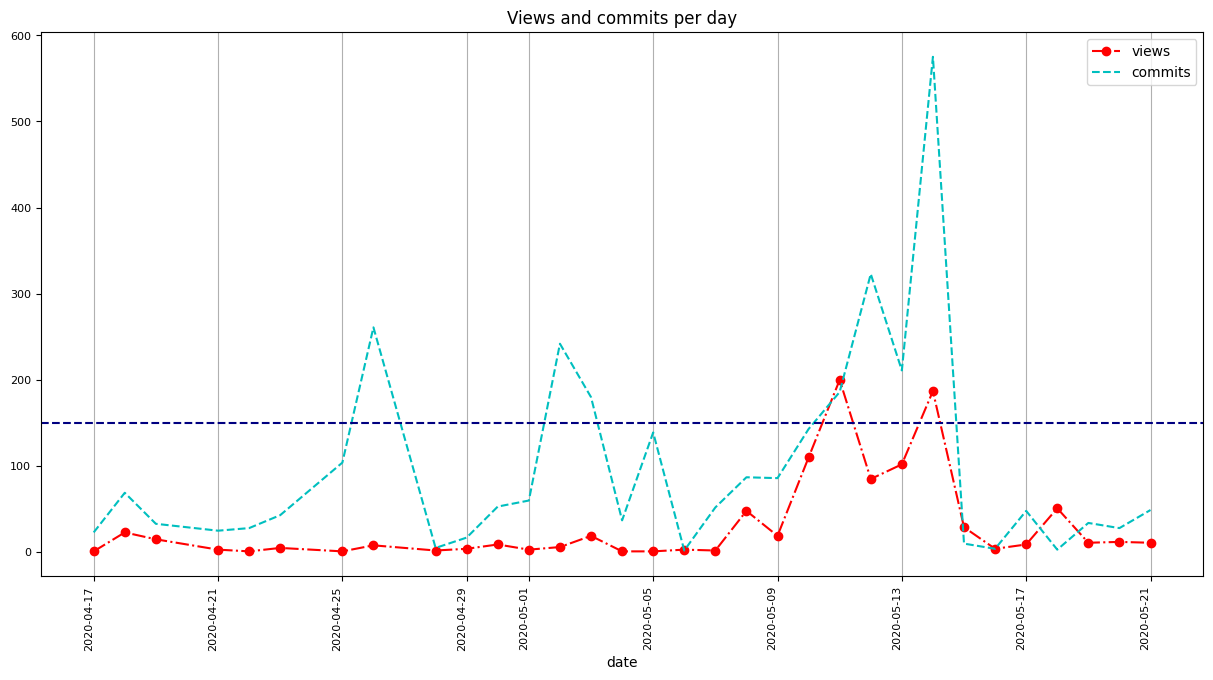

In [16]:
plt = views_commits.plot(y=['views', 'commits'],
                         color=['r', 'c'], style=['-.o', '--'],
                         title='Views and commits per day',
                         xlabel='date', rot=90,
                         figsize=(15,8), fontsize=8)
plt.axhline(y=150, color='navy', linestyle='--')
plt.grid(axis='x')
plt

---
## Answer the question

How many times was the ***number*** of ***views*** larger than ***150***?\
The *answer* is <u>2</u>

---
## Close the connection

In [17]:
con.close()